In [1]:
import math
# the numpy numerical module
import numpy as np
# the matplotlib plotting module

import matplotlib.pyplot as plt
# the pandas data analysis module
import pandas as pd

In [3]:
# import modules from musicntwrk
from musicntwrk.comptools.displayNotes import displayNotes
from musicntwrk.comptools.music import Rest,Note,NoteSeq
from musicntwrk.comptools.genmidi import Midi

In [5]:
# import special functions form scipy
from scipy.special import binom, bernoulli

## Music from Math

In [6]:
# Define auxiliary function

# function that produces a NoteSeq sequence from a list of MIDI numbers
def MIDI_notes(midi_list=None, duration=None, volume=None):
    sequence = NoteSeq()
    for n,pitch in enumerate(midi_list):
        note = pitch % 12
        octave = divmod(pitch,12)[0]
        try:
            dur = duration[n]
            if dur == 0:
                dur = 1/4
        except:
            dur = 1/4
        try:
            vol = volume[n]
        except:
            vol = 100
        sequence.append(Note(note, octave, dur, vol))
    return(sequence)

### Functions that generate integers

In [9]:
# Pascal's triangle}
# C(n,k) = binomial(n,k) = n!/(k!*(n-k)!), 0 <= k <= n

nmax = 10
pascal = []
for n in range(nmax):
    for k in range(n+1):
        pascal.append(int(binom(n,k)))

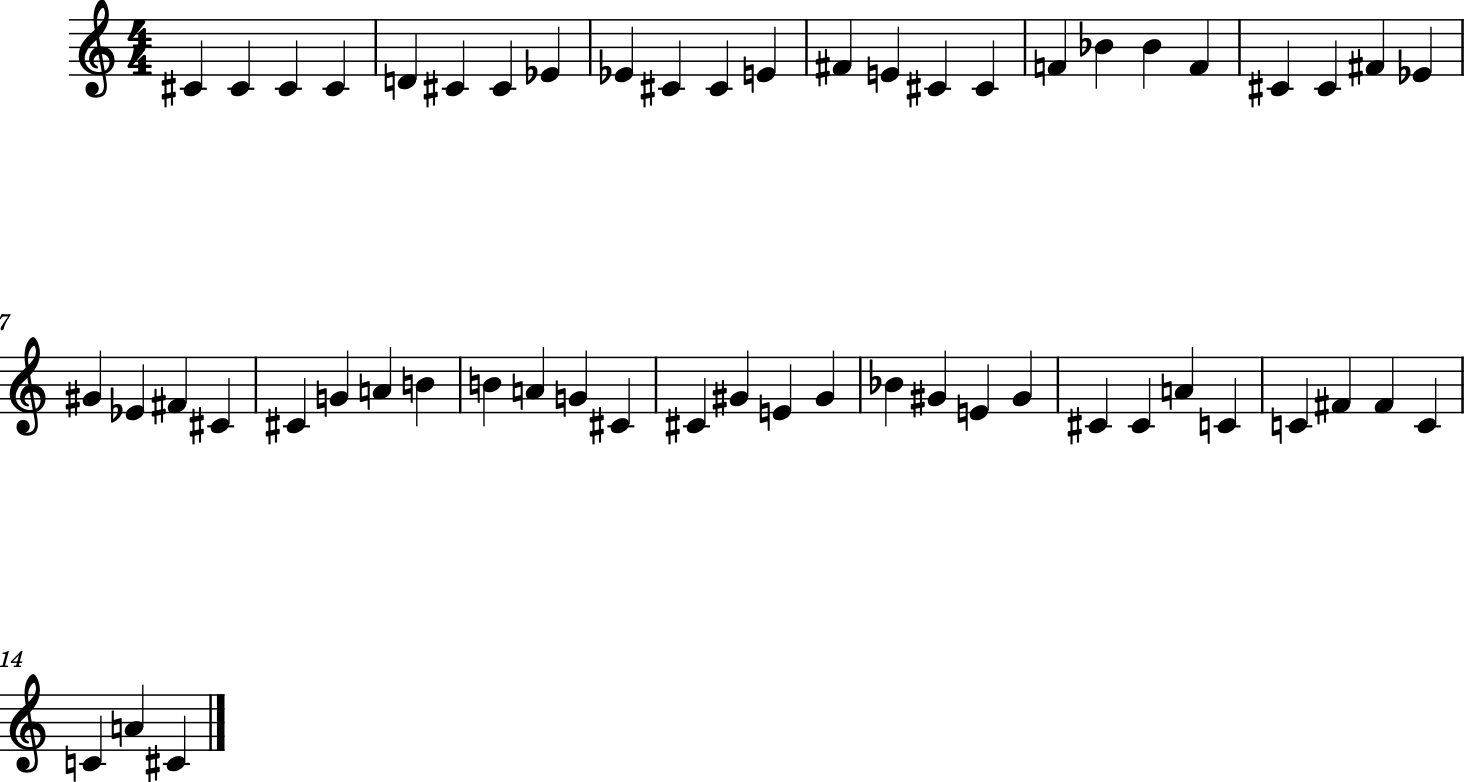

In [14]:
displayNotes([MIDI_notes(midi_list=[p%12+60 for p in pascal])],show='midi')

In [11]:
# Fibonacci sequence
# F(n) = F(n-1) + F(n-2) with F(0) = 0 and F(1) = 1

nmax = 48
fibo = [0,1]
for n in range(2,nmax):
    fibo.append(fibo[-1]+fibo[-2])

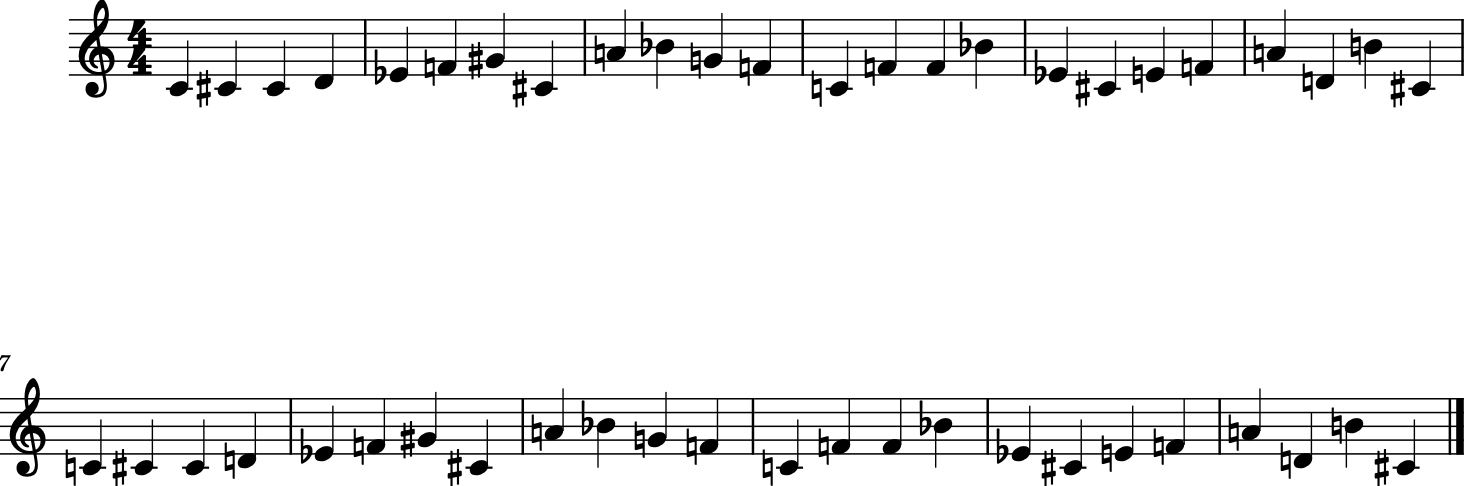

In [17]:
displayNotes([MIDI_notes(midi_list=[p%12+60 for p in fibo])],show='midi')

### Mapping example

In [13]:
# chromatic scale from C4 to C6 as MIDI numbers
scale = np.linspace(48,72,25).astype(int)
print(scale)

[48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]


[0.14095773 0.12147545 0.19102859 0.50082572 0.63108857 0.73170863
 0.66701589 0.05999293 0.75561093 0.07545126 0.0822974  0.13814546
 0.60849138 0.85999904 0.34123271 0.57445664 0.57761017 0.67862889
 0.8124919  0.25309318]


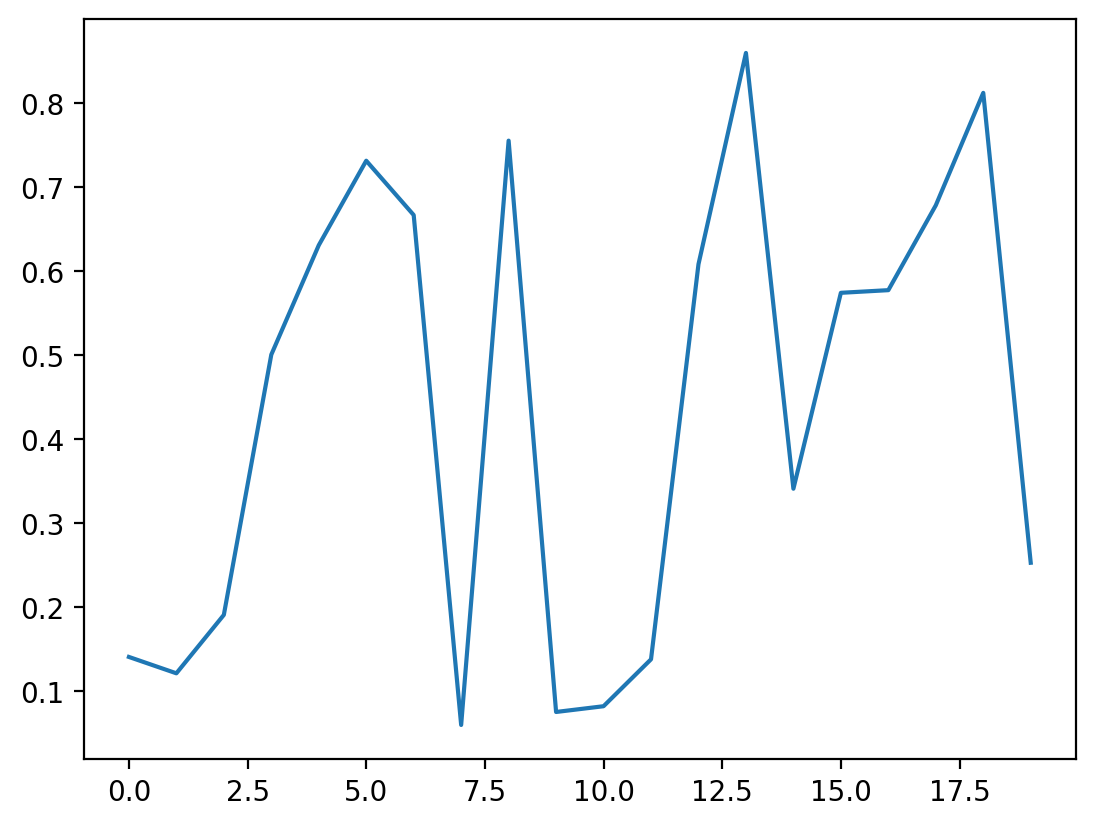

In [15]:
sequence = np.random.rand(20)
print(sequence)
plt.plot(sequence)
plt.show()

In [17]:
mapping = ((sequence - np.min(sequence))/(np.max(sequence)-np.min(sequence))*(len(scale)-1)).astype(int)

[50 49 51 61 65 68 66 48 68 48 48 50 64 72 56 63 63 66 70 53]


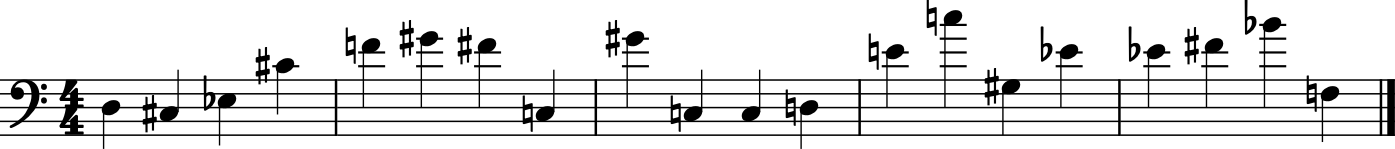

In [19]:
print(scale[mapping])
displayNotes([MIDI_notes(midi_list=scale[mapping])],show='midi')

### Duration mapping example

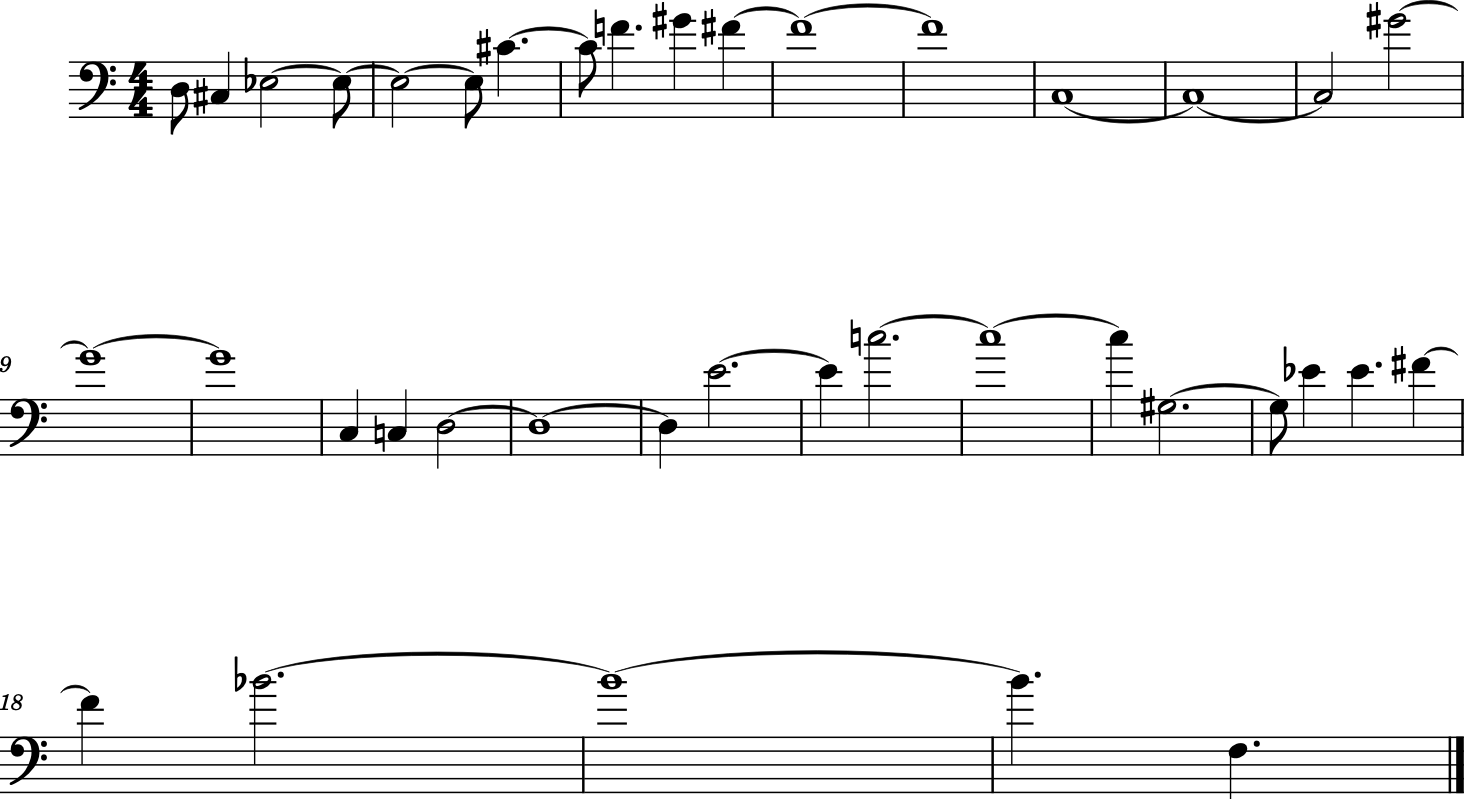

In [21]:
beat = 8
p = scale[mapping]
durmap = np.abs((p - np.roll(p,-1))/beat)
displayNotes([MIDI_notes(midi_list=scale[mapping],duration=durmap)],show='midi')

## Exercise 1

go to The On-Line Encyclopedia of Integer Sequences (https://oeis.org/) and pick one or more sequences to work with: 
1. Explore combinations of pitch/duration (using same or different sequences) - think on strategies to map numbers to durations
2. Explore different mappings of both pitch and durations

***

## Music from data

In [23]:
import pandas as pd
from sklearn import datasets
from pandas.plotting import scatter_matrix

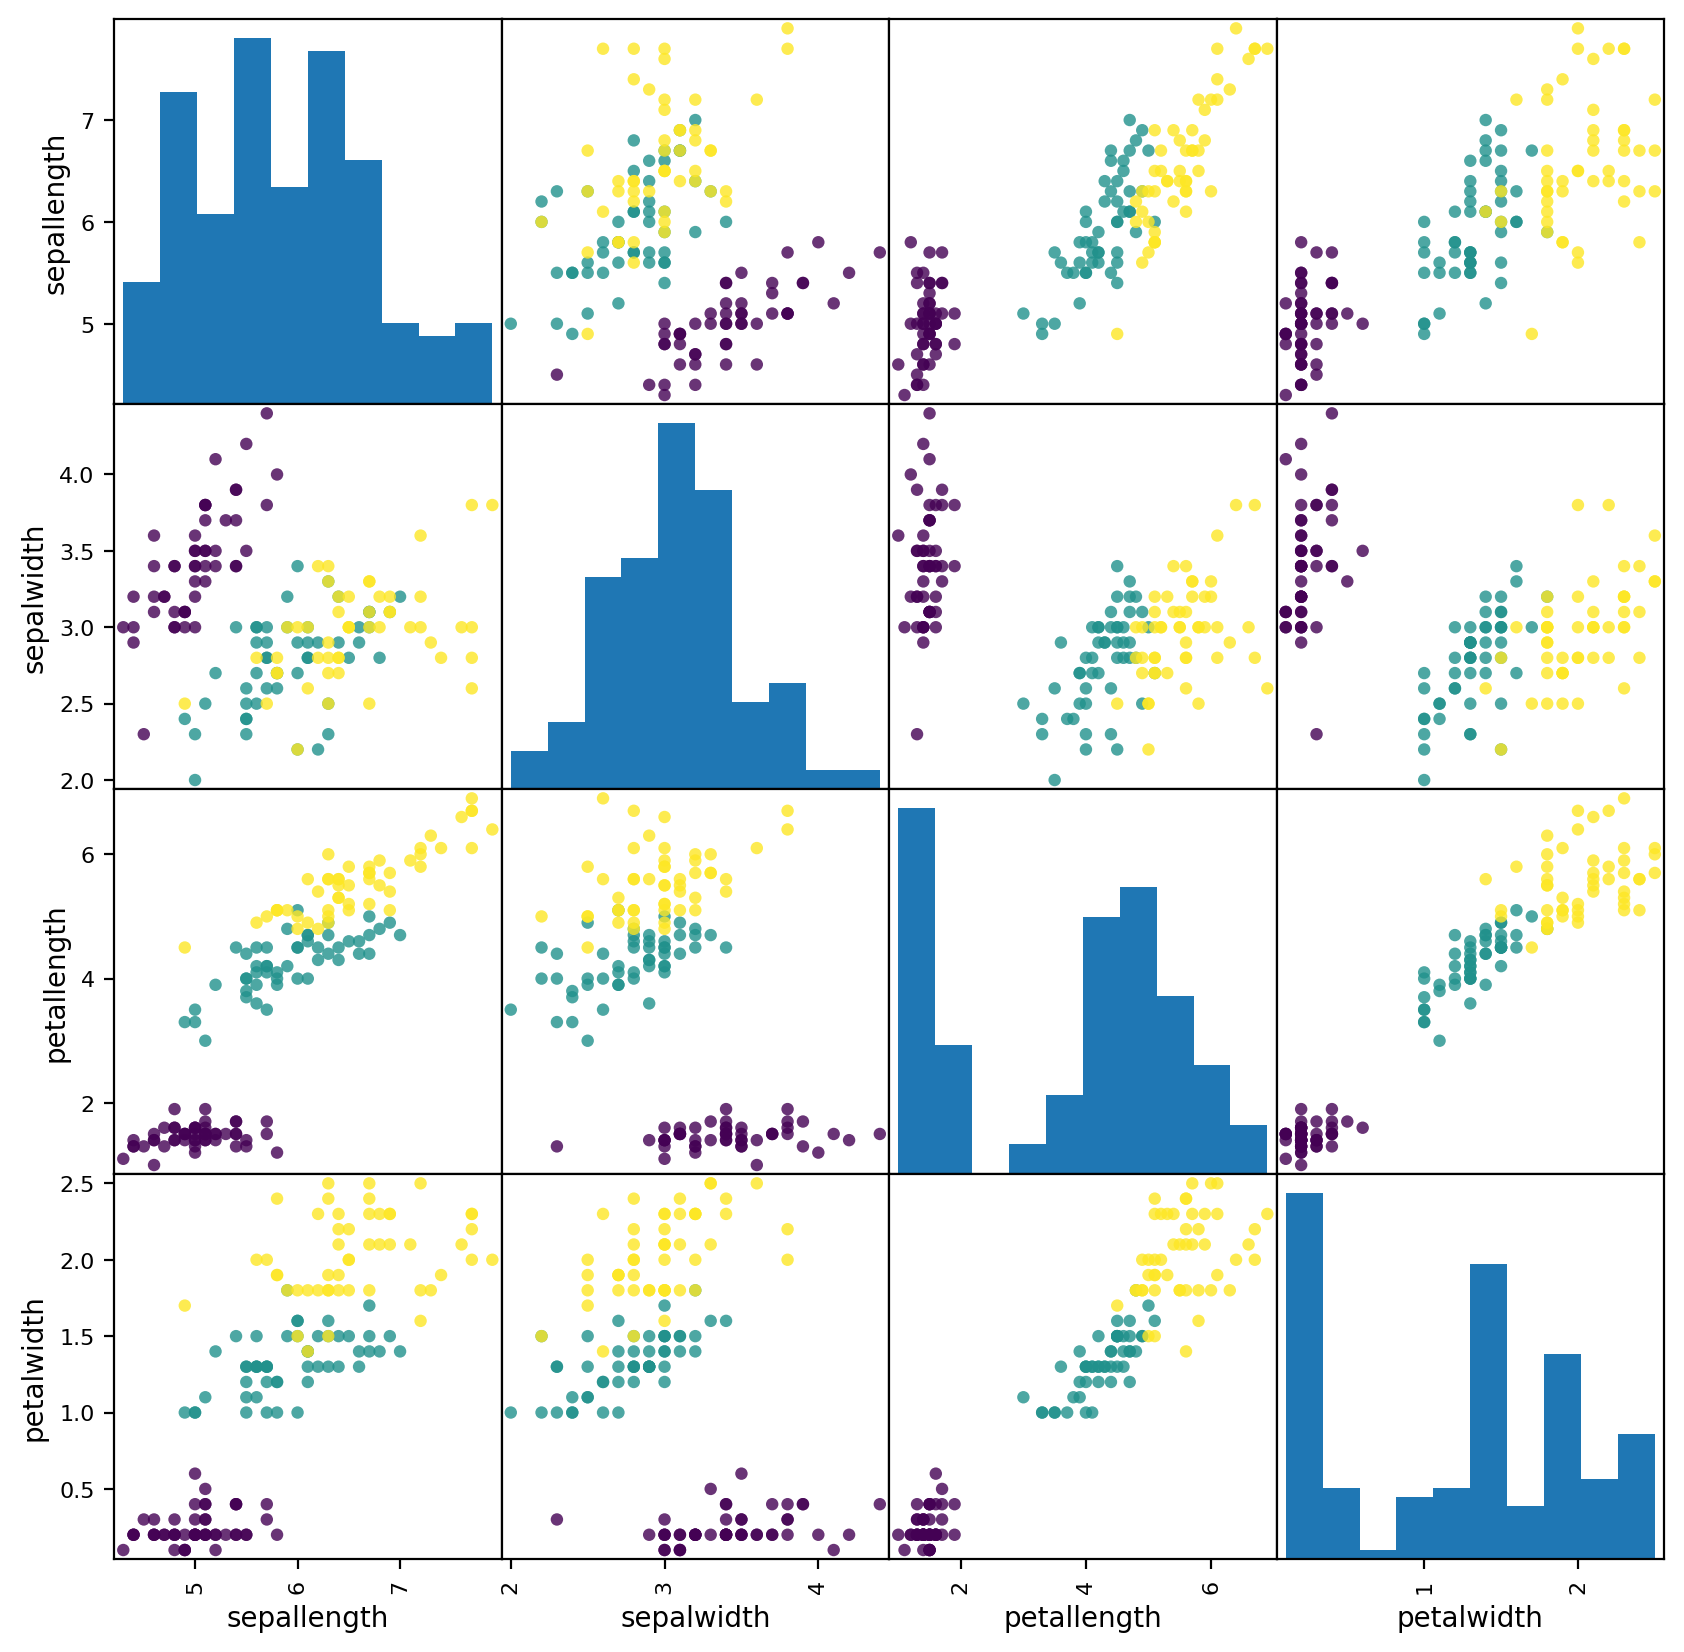

In [25]:
#loading dataset
iris = datasets.load_iris()
#creating data frame for pandas
data = pd.read_csv('./03.Data/iris.csv')
#ploting scatter graph of species comparing all features to each other
scatter_matrix(data, c=iris['target'],figsize=(10,10),marker='o',s=20,alpha=.8)
plt.show()

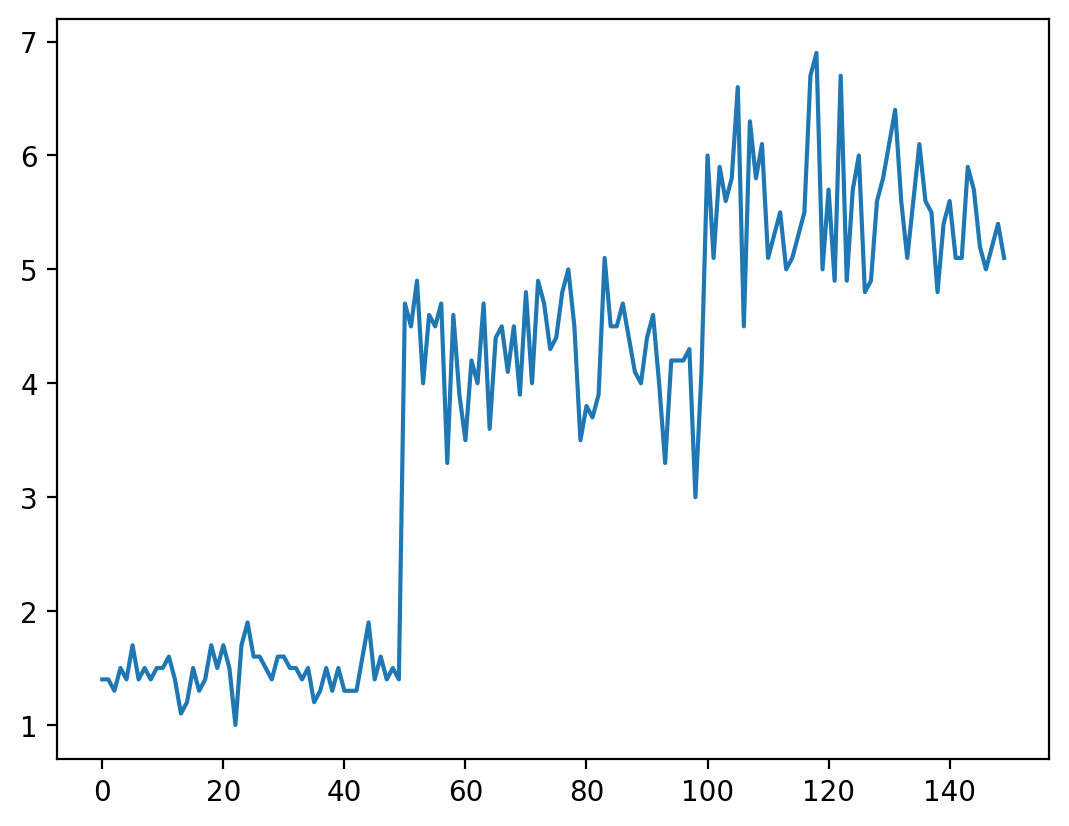

In [27]:
plt.plot(data['petallength'])

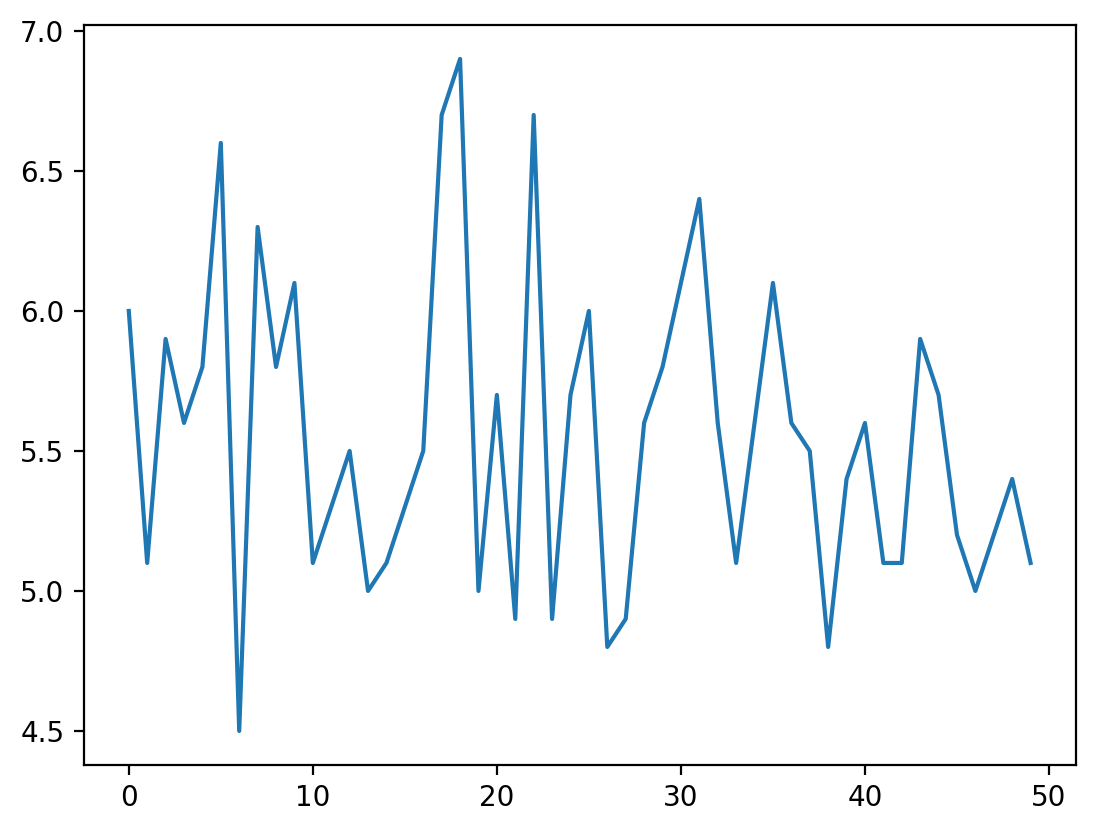

In [29]:
p = [p for i,p in enumerate(data['petallength']) if data['class'][i] == 'Iris-virginica']
plt.plot(p)

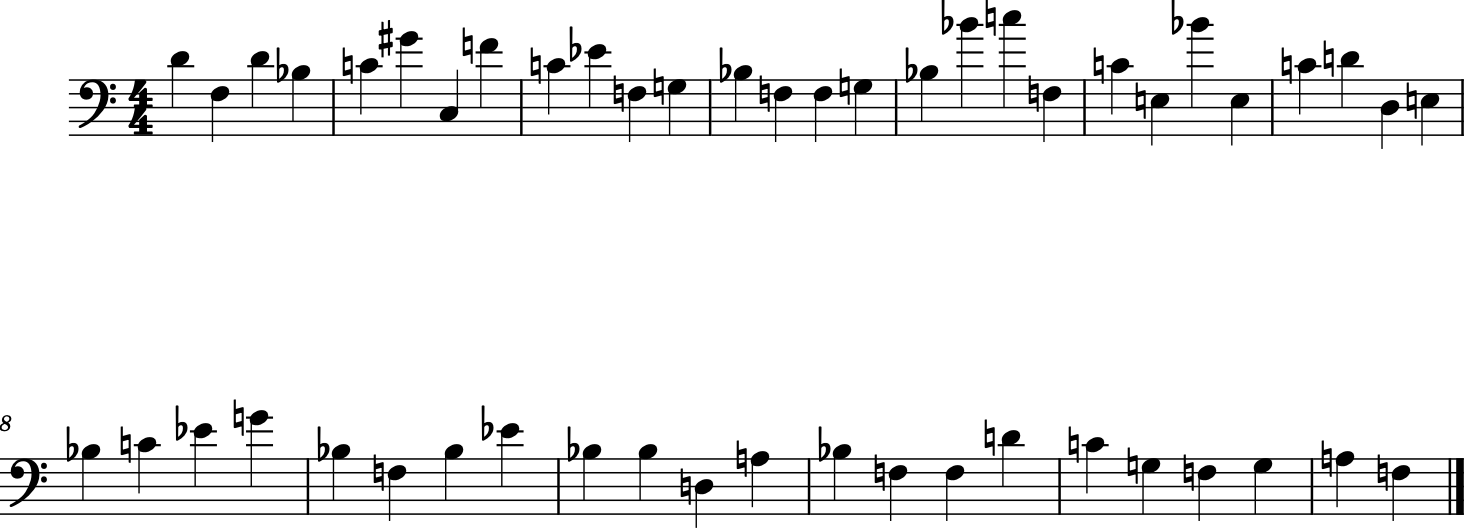

In [31]:
mapping = ((p - np.min(p))/(np.max(p)-np.min(p))*(len(scale)-1)).astype(int)
displayNotes([MIDI_notes(midi_list=scale[mapping])])

## Exercise 2

Explore the Iris dataset and compose a piece where you combine the data in creative ways. Expand the mapping operations.

***

## Music from process

## Reich's piano phase (1967)

### "in phase only" version

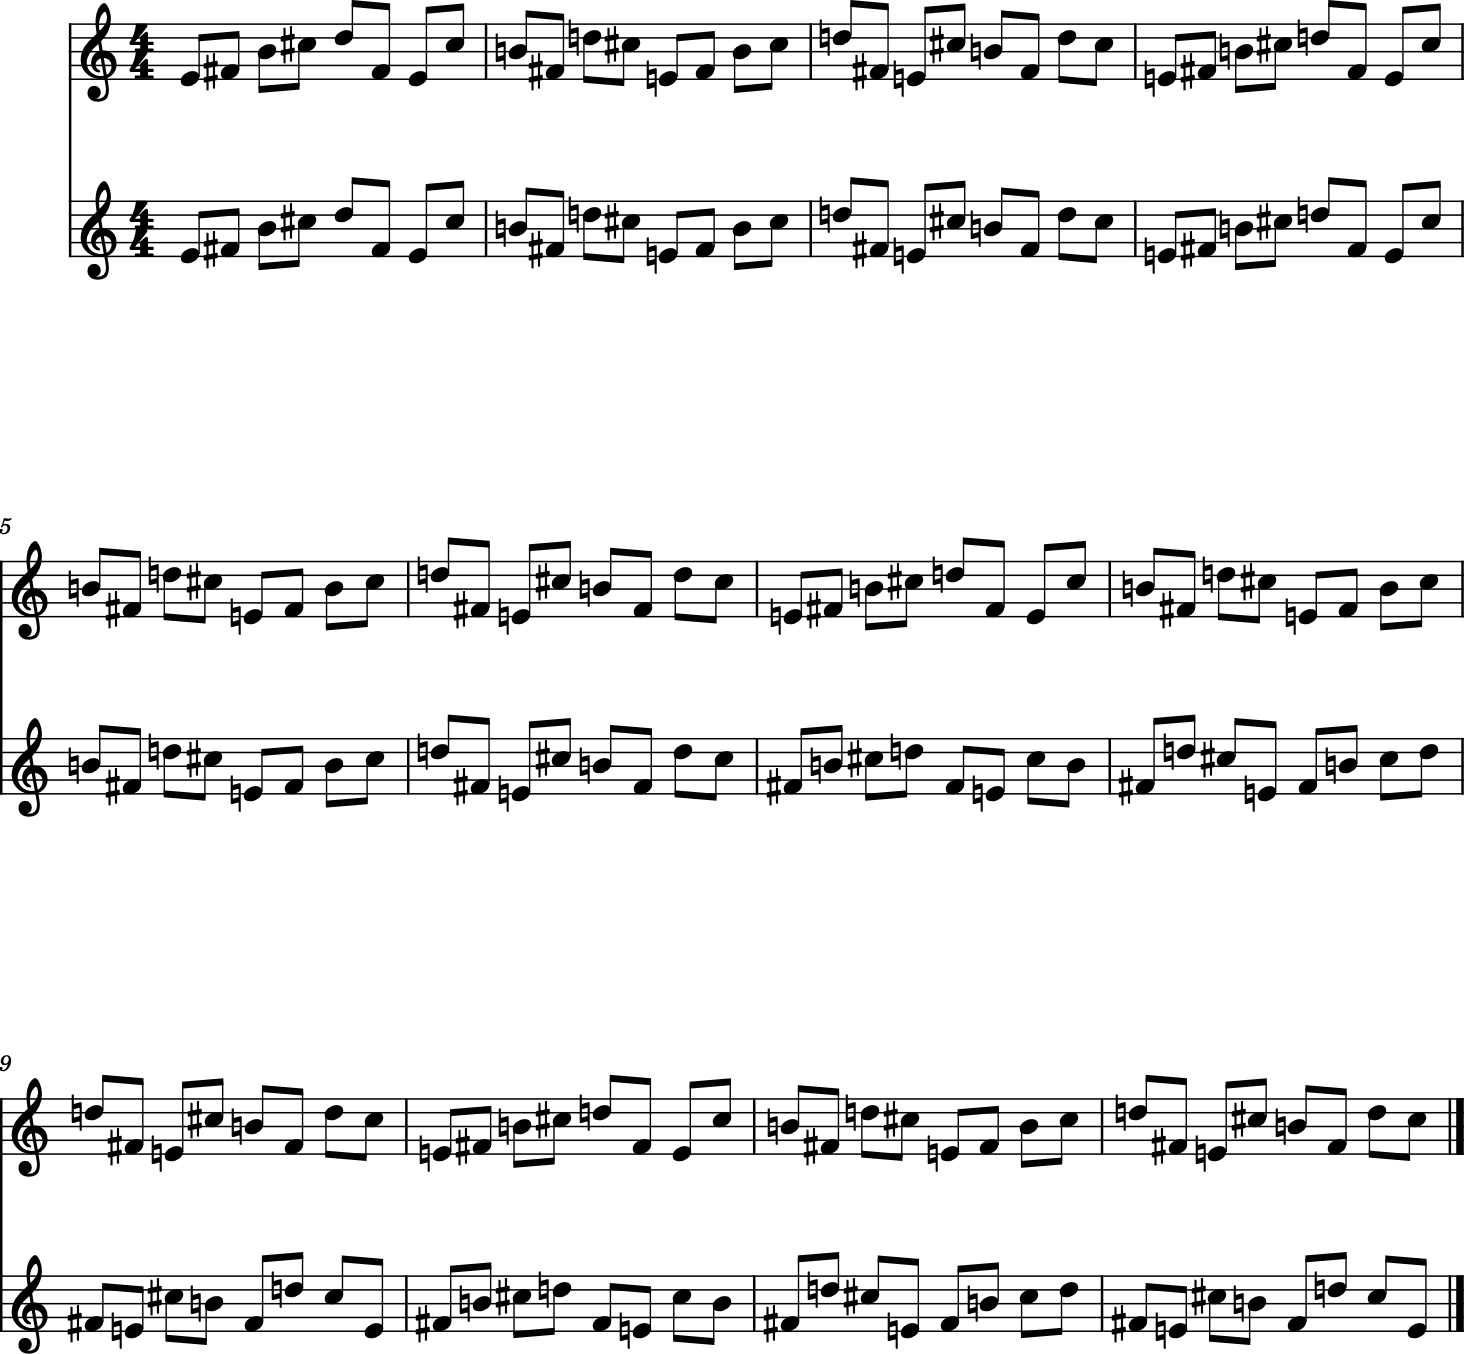

In [33]:
sequence1 = NoteSeq("E8 F# B C#'' D'' F#' E C#'' B' F# D'' C#")
sequence2 = NoteSeq("E8 F# B C#'' D'' F#' E C#'' B' F# D'' C#")

# Section 2
len1 = 4
notes1 = sequence1*len1
notes2 = sequence2*len1
# Section 4
len4 = 4
tmp1 = sequence1*len4
sequence2 = sequence2.rotate(1)
tmp2 = sequence2*len4
notes1 = notes1 + tmp1
notes2 = notes2 + tmp2
# etc...
displayNotes([notes1,notes2],show='midi')

## Exercise 3

How do you generalize the code above to generate the full composition?

### adding an "out-of-phase" section

In [37]:
sequence1 = NoteSeq("E1 F# B C#'' D'' F#' E C#'' B' F# D'' C#")
sequence2 = NoteSeq("E1 F# B C#'' D'' F#' E C#'' B' F# D'' C#")

# in phase
len1 = 2
notes1 = sequence1*len1
notes2 = sequence2*len1

for r in range(4):
    # out of phase
    len2 = 8
    tmp1 = sequence1*len2
    tmp2 = sequence2*len2 + sequence2[0]  # stretch the tempo as to add one note at the end of the cycle
    tmp2 = tmp2.stretch_dur(len2*12/(len2*12+1))
    notes1 = notes1 + tmp1[:-12]
    notes2 = notes2 + tmp2[:-12]
    # in phase again
    len3 = 4
    tmp1 = sequence1*len3
    sequence2 = sequence2.rotate(1)
    tmp2 = sequence2*len3
    notes1 = notes1 + tmp1
    notes2 = notes2 + tmp2

midi = Midi(number_tracks=2, tempo=800)
midi.seq_notes(notes1, track=0)
midi.seq_notes(notes2, track=1)
midi.write('piano-phase.mid')

## J.S. Bach - Canon 1 a 2 "cancrizans" from the Musical Offering

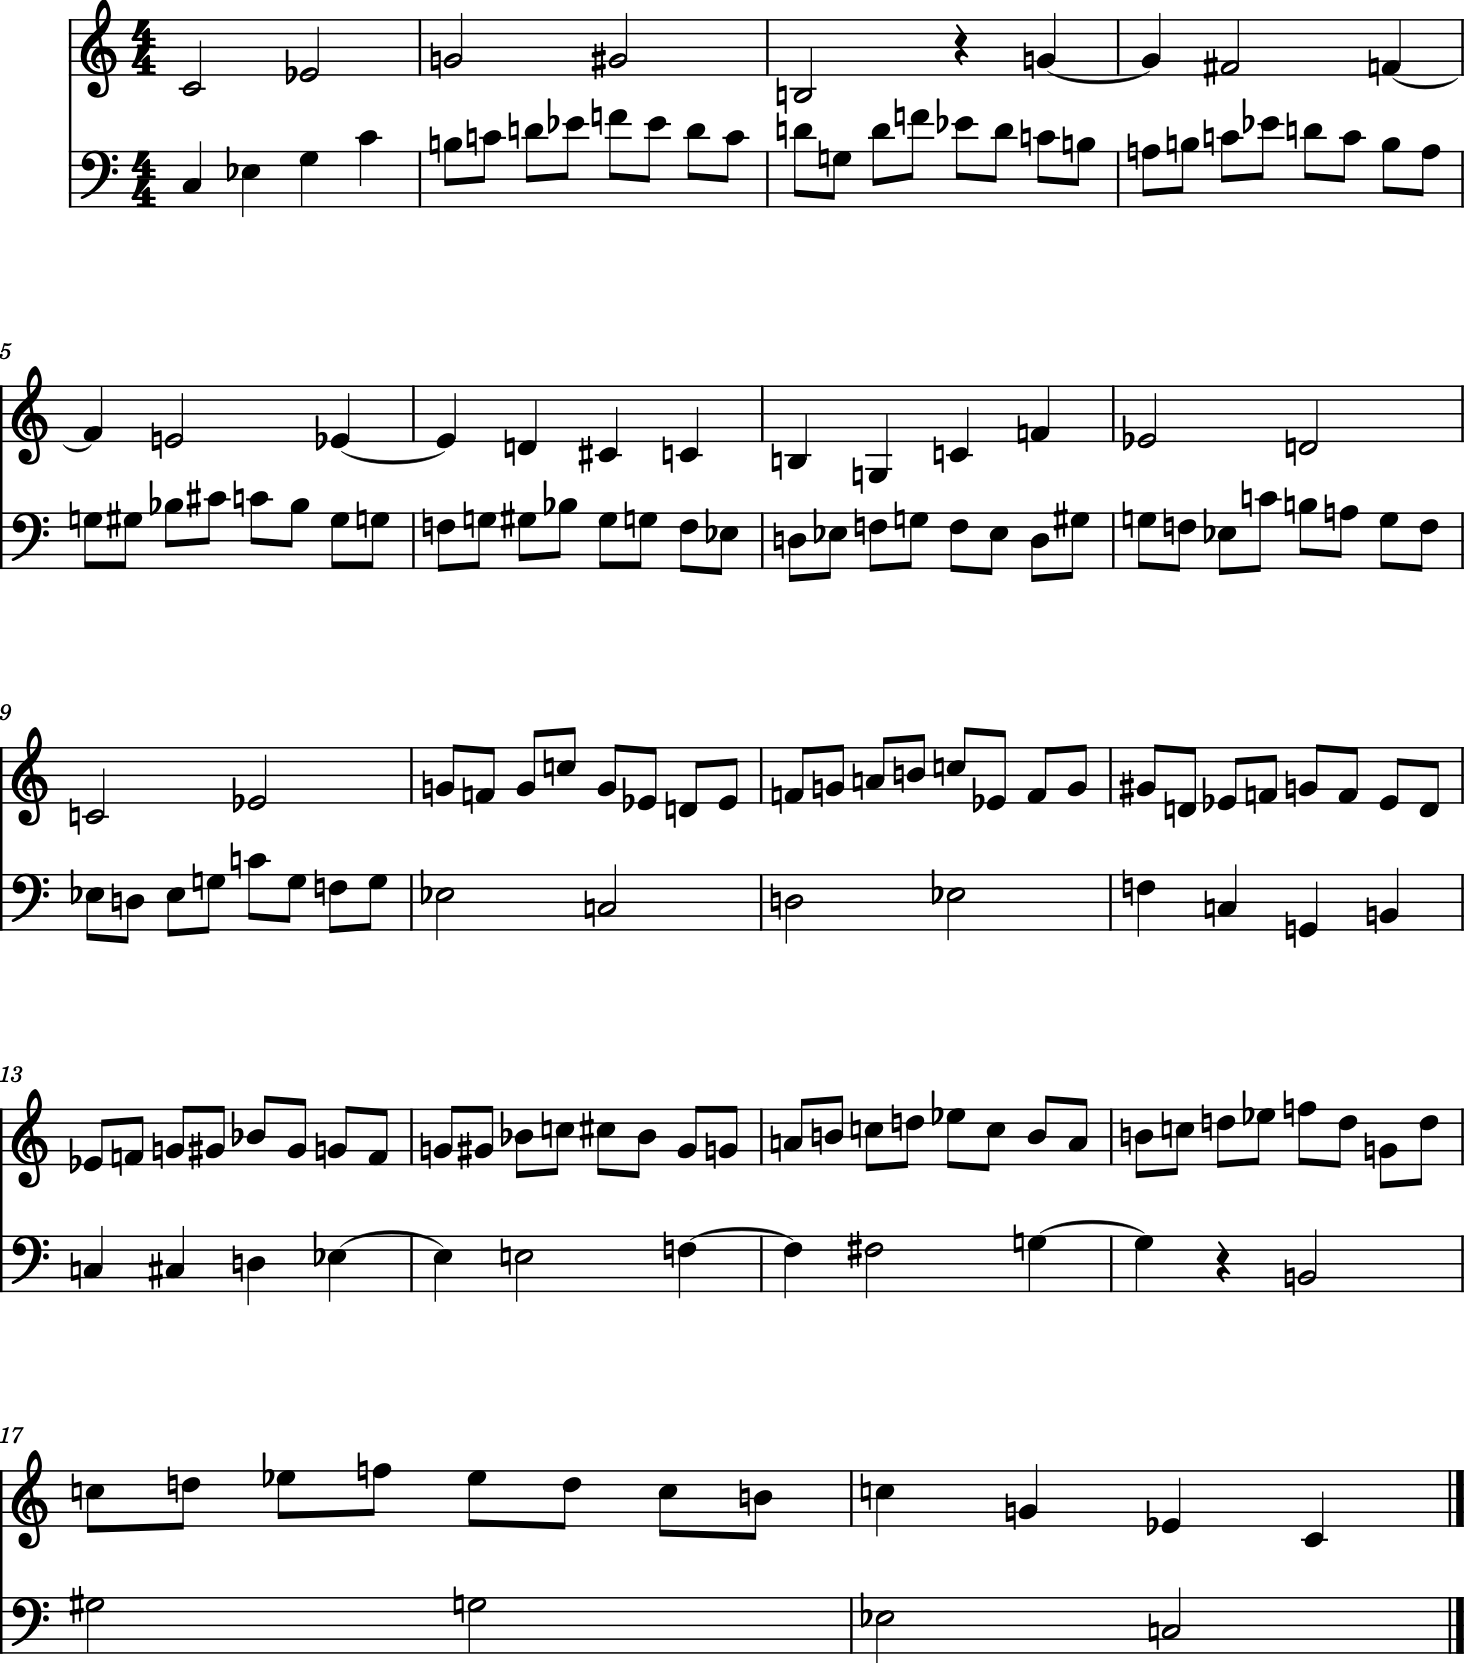

In [39]:
theme = NoteSeq('file://03.Data/canon-crab')
rev_theme = theme.transposition(-12).retrograde()

displayNotes([theme,rev_theme],show='midi')

## J.S. Bach - Canon a 2 "querendo invenietis" from the Musical Offering

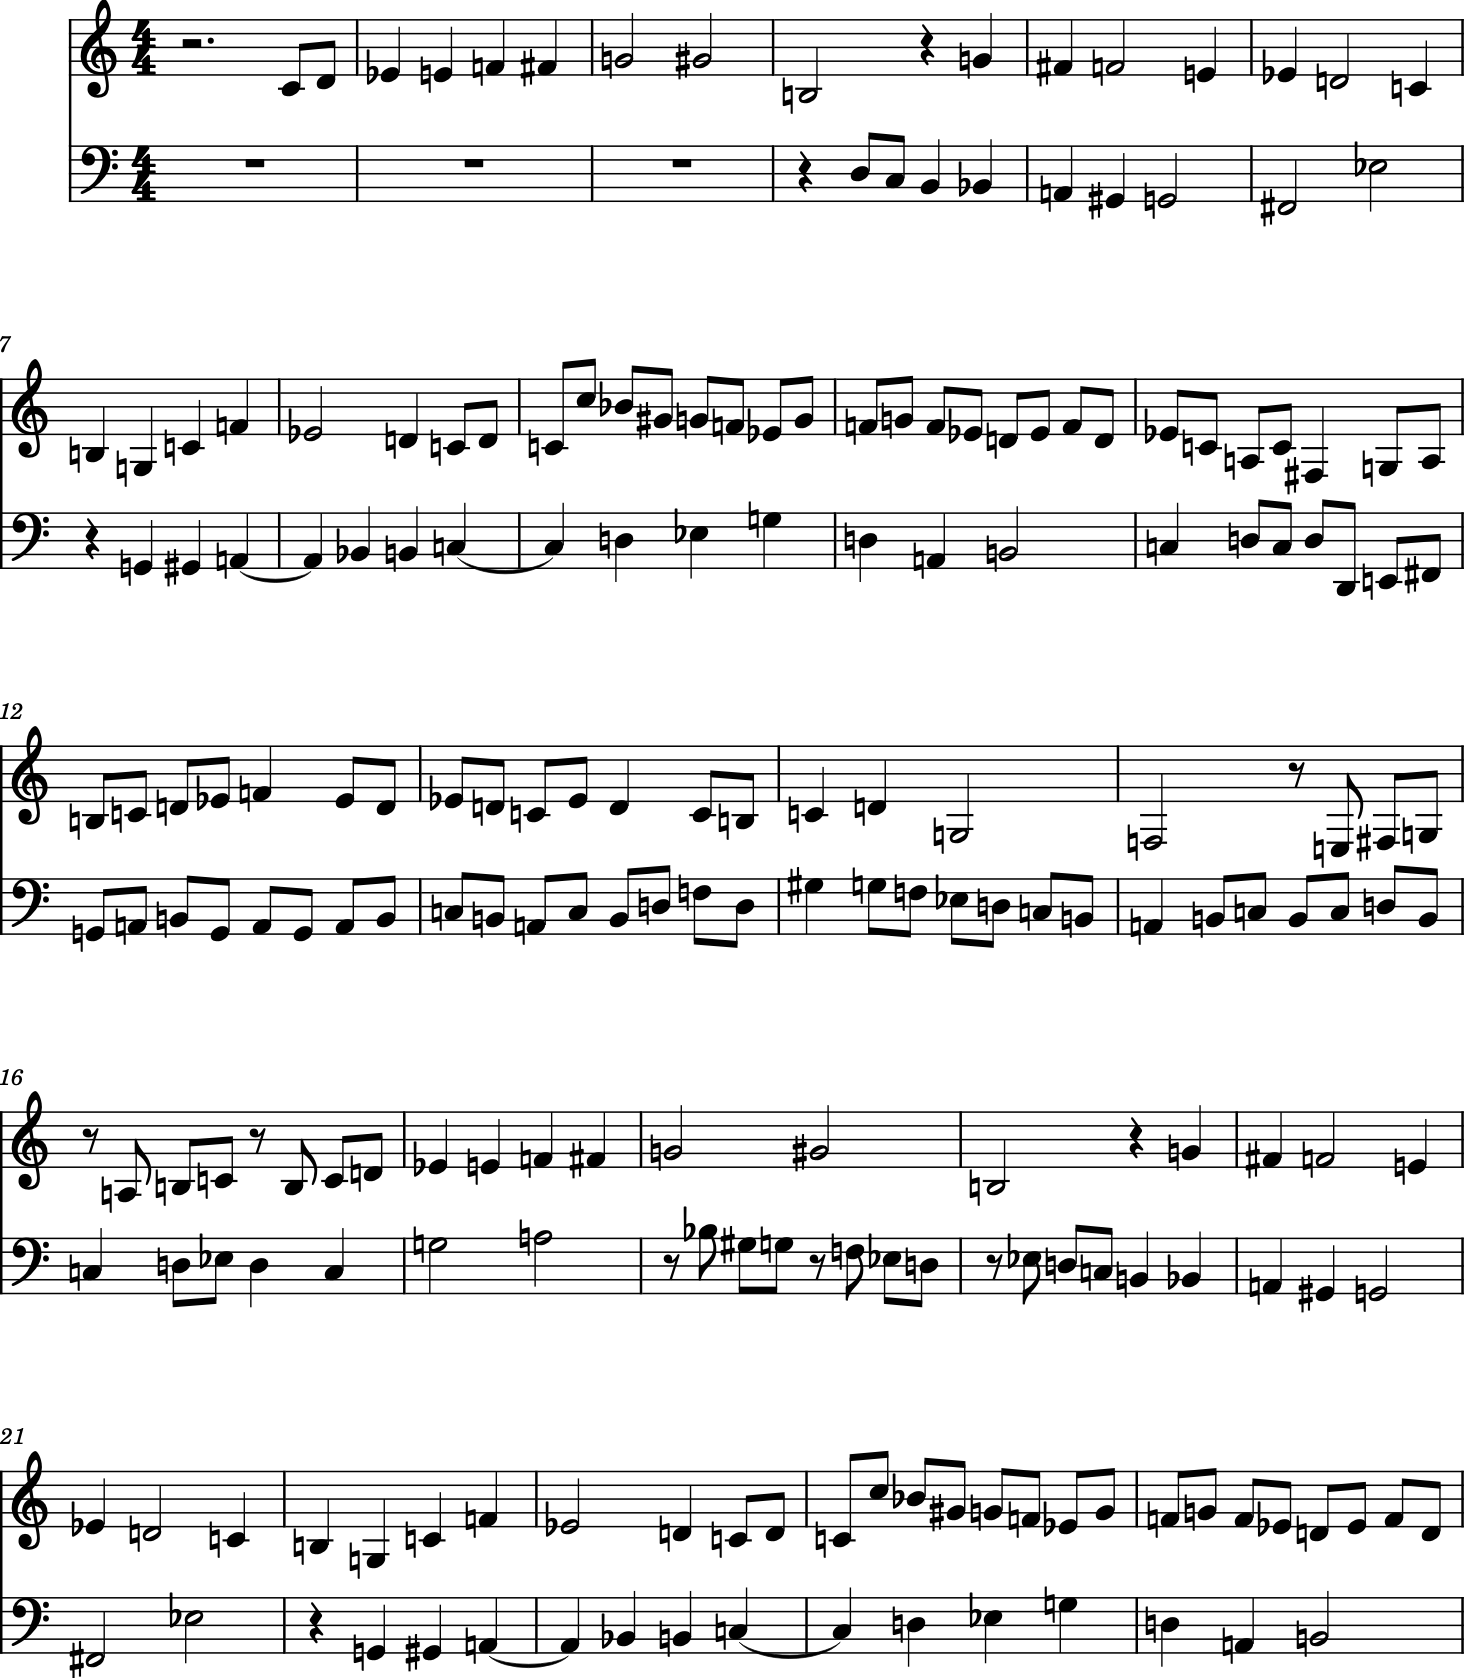

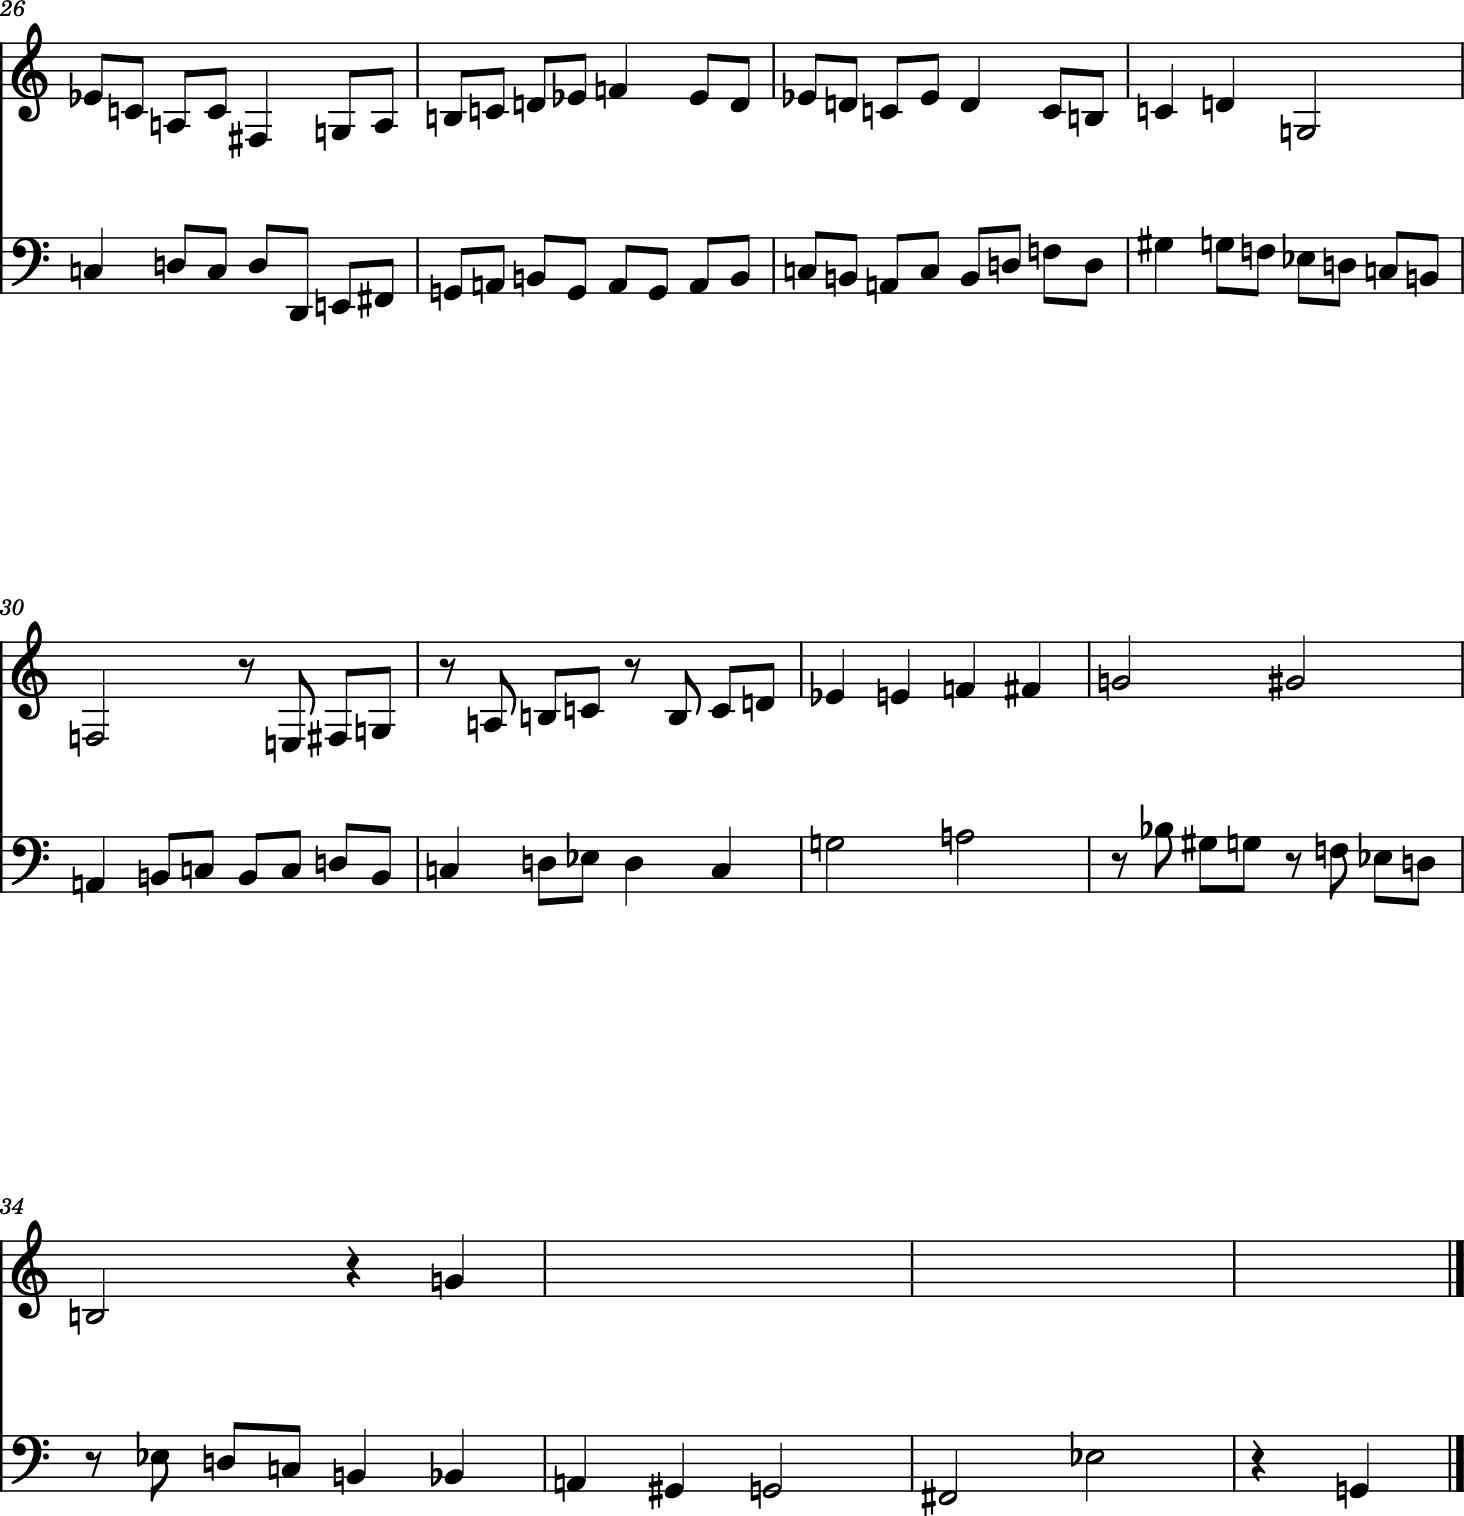

In [41]:
theme1 = NoteSeq('file://03.Data/canon-quaerendo-invenietis')
part1 = theme1 + theme1[2:] + theme1[2:11]
part2 = theme1 + theme1[2:] + theme1[2:11]
voice1 = NoteSeq([Rest(3/4)]) + part1
voice2 = NoteSeq([Rest(13/4)]) + part2.inversion_startswith(Note(2, 4))
displayNotes([voice1,voice2],show='midi')

## Josquin Des Prez - prolation canon from Agnus Dei of the Missa l'Homme Armé

In [43]:
main_theme = NoteSeq('file://josquin')
theme1 = main_theme.stretch_dur(0.66666)
theme2 = main_theme[0:24].stretch_dur(2).transp(Note('C'))
theme3 = main_theme[0:50]

midi = Midi(3, tempo=80)
midi.seq_notes(theme1, track=0)
midi.seq_notes(theme2, track=1)
midi.seq_notes(theme3, track=2)
midi.write('./josquin.mid')

## Exercise 4

Define the algorithmic structure for the canon taxonomy:
    1. strict canon
    2. inversion canon
    3. retrograde canon
    4. prolation canon
    5. double canon
    6. mirror canon
    7. table canon